In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

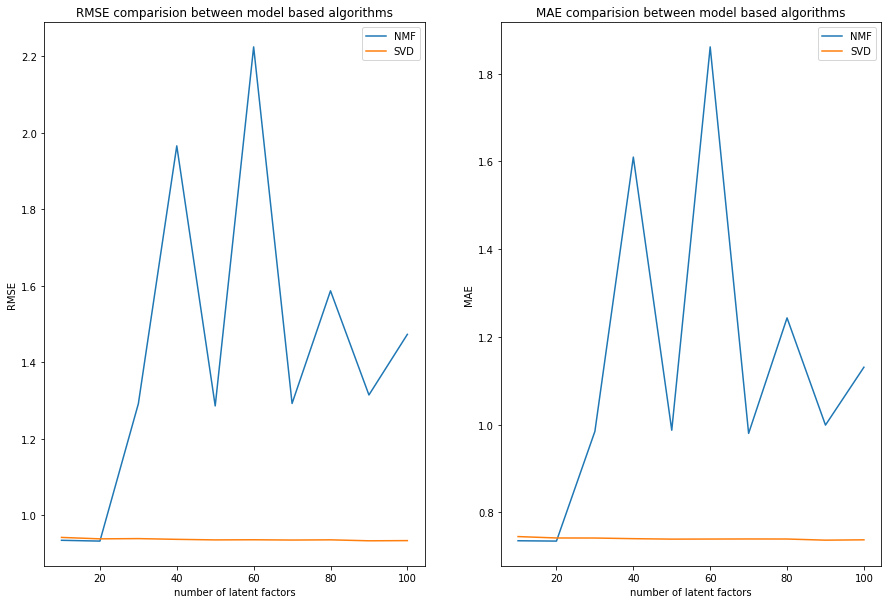

In [21]:
import pickle
res = pickle.load(open("nmf_svd_factor_plot.dat","rb"))
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
subplots = [ax1, ax2]
error_metric = ["RMSE","MAE"]
algorithms = ["NMF","SVD"]
latent_factors = [10,20,30,40,50,60,70,80,90,100]
data = {}
data[0] = {}
data[0]["NMF"] = [res['nmf'][x][0] for x in latent_factors]
data[0]["SVD"] = [res['svd'][x][0] for x in latent_factors]
data[1] = {}
data[1]["NMF"] = [res['nmf'][x][1] for x in latent_factors]
data[1]["SVD"] = [res['svd'][x][1] for x in latent_factors]

for i in range(len(subplots)):
    for algorithm in algorithms:
        subplots[i].plot(latent_factors, data[i][algorithm], label=algorithm)
        subplots[i].set_xlabel("number of latent factors")
        subplots[i].set_ylabel(error_metric[i])
        subplots[i].set_title(error_metric[i]+" comparision between model based algorithms")
        subplots[i].legend(loc="upper right")
plt.show()
fig.savefig('./nmf_svd_comparision.png')

    Unnamed: 0 Dataset       MAE  Precision      RMSE    Recall  \
2            2    100k  0.721269   0.589848  0.919590  0.296831   
12          12    250k  0.693172   0.664284  0.883939  0.408399   
22          22    500k  0.684321   0.665959  0.872803  0.351097   
32          32    750k  0.680895   0.679370  0.868242  0.304644   
42          42      1M  0.679981   0.676377  0.868032  0.244913   

                 Running_Time  User-based?   k  Running_Time_Minutes  
2   0 days 00:00:35.519000000         True  50              0.591983  
12  0 days 00:05:14.760000000         True  50              5.246000  
22  0 days 00:17:09.270000000         True  50             17.154500  
32  0 days 00:28:42.394000000         True  50             28.706567  
42  0 days 00:39:27.308000000         True  50             39.455133  
    Unnamed: 0 Dataset       MAE  Precision      RMSE    Recall  \
7            7    100k  0.718497   0.613813  0.915136  0.288532   
17          17    250k  0.688562   0.

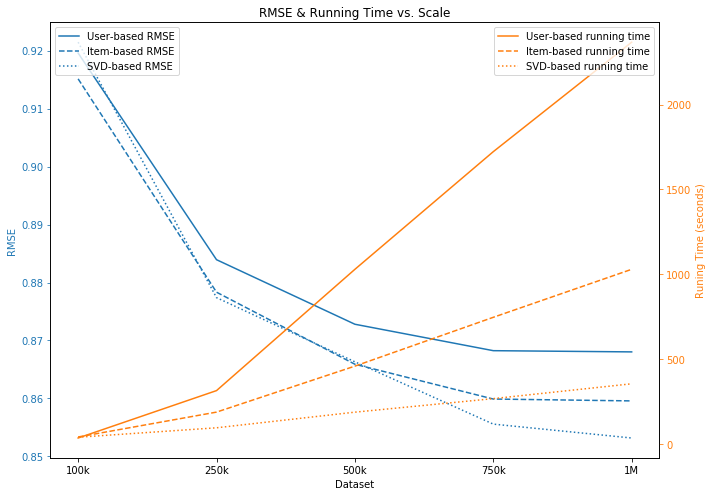

In [18]:
df = pd.read_csv("100k_to_1M_Results.csv")
svd_res = pd.read_csv("scale_svd_results.csv")
user_based_df = df[(df["k"]==50) & (df["User-based?"]==True)]
print user_based_df
item_based_df = df[(df["k"]==50) & (df["User-based?"]==False)]
print item_based_df
svd_res_df = svd_res
print svd_res_df

x = [1,2,3,4,5]
dataset_sizes = user_based_df["Dataset"].tolist()
print dataset_sizes

linestyle = "--"
linestyle2 = ":"
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("RMSE & Running Time vs. Scale")
line1 = ax1.plot(x, user_based_df["RMSE"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["RMSE"], color="tab:blue", linestyle=linestyle)
line3 = ax1.plot(x, svd_res_df["RMSE"], color="tab:blue", linestyle=linestyle2)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("RMSE", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax2 = ax1.twinx()
line3 = ax2.plot(x, user_based_df["Running_Time_Minutes"]*60, color="tab:orange")
line4 = ax2.plot(x, item_based_df["Running_Time_Minutes"]*60, color="tab:orange", linestyle = linestyle)
line5 = ax2.plot(x, svd_res_df["Average_Running_Time"], color="tab:orange", linestyle = linestyle2)
ax2.set_ylabel("Runing Time (seconds)", color='tab:orange')
ax2.tick_params("y", colors='tab:orange')

ax1.legend(("User-based RMSE", "Item-based RMSE", "SVD-based RMSE"), loc="upper left")
ax2.legend(("User-based running time", "Item-based running time", "SVD-based running time"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()
fig.savefig("time_rmse_scale.png")

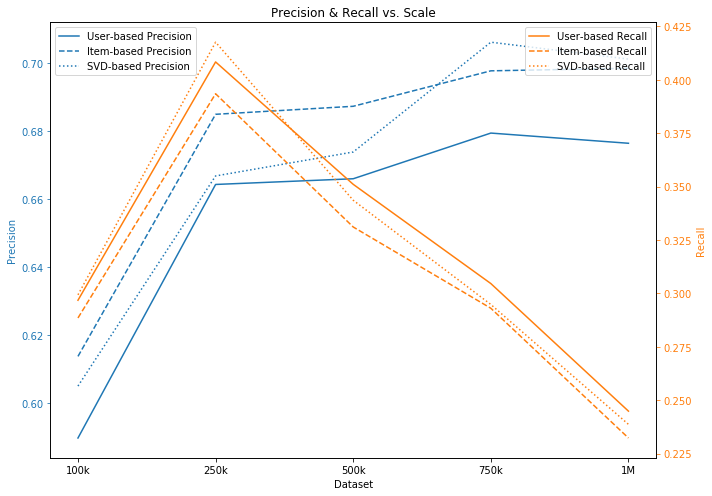

In [19]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("Precision & Recall vs. Scale")
line1 = ax1.plot(x, user_based_df["Precision"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["Precision"], color="tab:blue", linestyle=linestyle)
line3 = ax1.plot(x, svd_res_df["Precision"], color="tab:blue", linestyle=linestyle2)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("Precision", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax2 = ax1.twinx()
line3 = ax2.plot(x, user_based_df["Recall"], color="tab:orange")
line4 = ax2.plot(x, item_based_df["Recall"], color="tab:orange", linestyle = linestyle)
line5 = ax2.plot(x, svd_res_df["Recall"], color="tab:orange", linestyle = linestyle2)
ax2.set_ylabel("Recall", color='tab:orange')
ax2.tick_params("y", colors='tab:orange')

ax1.legend(("User-based Precision", "Item-based Precision", "SVD-based Precision"), loc="upper left")
ax2.legend(("User-based Recall", "Item-based Recall", "SVD-based Recall"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()
fig.savefig("precision_recall_scale.png")

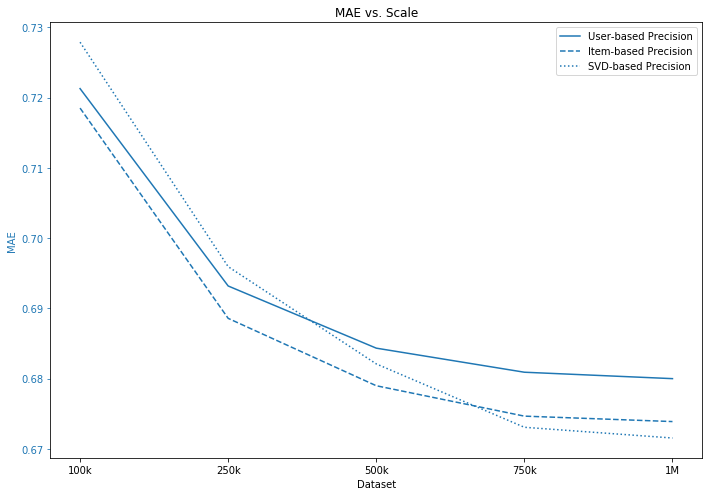

In [20]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.set_title("MAE vs. Scale")
line1 = ax1.plot(x, user_based_df["MAE"], color="tab:blue")
line2 = ax1.plot(x, item_based_df["MAE"], color="tab:blue", linestyle=linestyle)
line3 = ax1.plot(x, svd_res_df["MAE"], color="tab:blue", linestyle=linestyle2)

ax1.set_xlabel("Dataset")
ax1.set_ylabel("MAE", color='tab:blue')
ax1.tick_params("y", colors='tab:blue')

ax1.legend(("User-based Precision", "Item-based Precision", "SVD-based Precision"), loc="upper right")
fig.tight_layout()
plt.xticks(x, dataset_sizes)
plt.show()
fig.savefig("mae_scale.png")